# TQC 人工智慧 機器學習 證照 攻略(中)
## 第二類非監督學習 解題分享 (4/5)

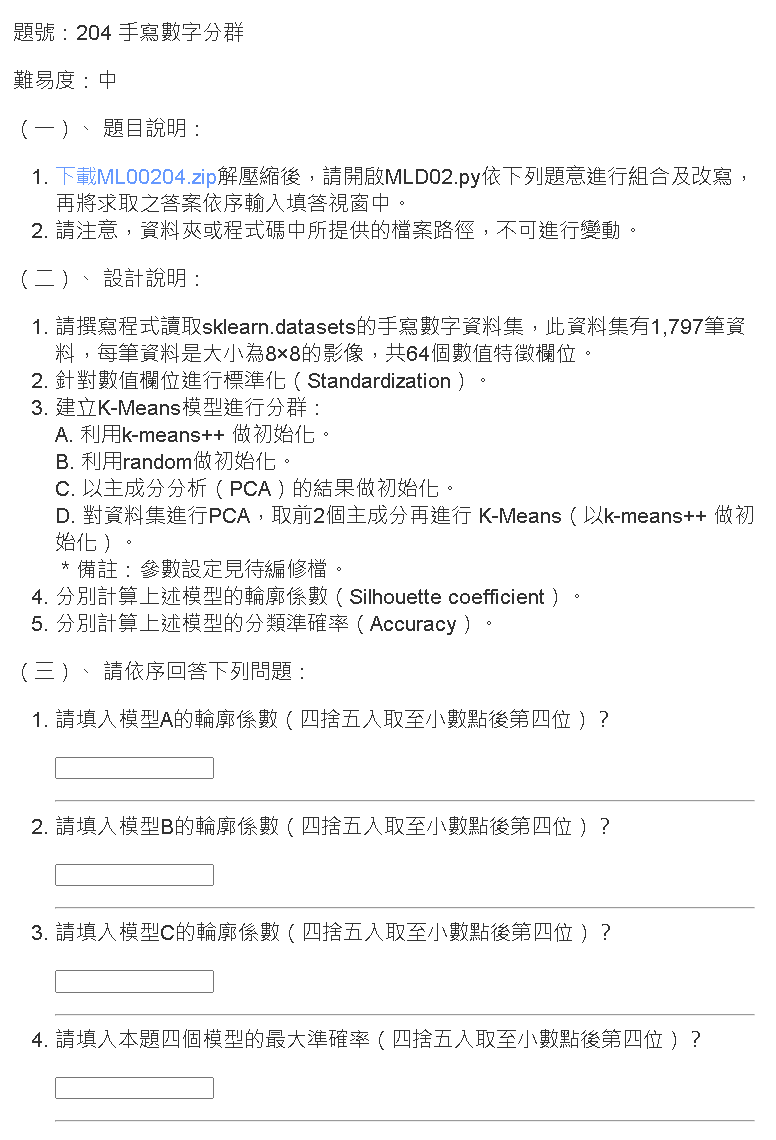

In [1]:
# #############################################################################
# 本題參數設定，請勿更改
seed = 0    # 亂數種子數
# #############################################################################
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
data = load_digits()
# 載入手寫數字資料集
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
# 特徵標準化(scale/StandardScaler)
from sklearn.preprocessing import scale
X = scale(X)

# 取出資料集的數字類別數
n_digits = 10

# 建立兩個 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# kmean1: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# kmean2: init='random', n_clusters=n_digits, n_init=10, random_state=seed
# #############################################################################
from sklearn.cluster import KMeans
kmean1 = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed)
kmean2 = KMeans(init='random', n_clusters=n_digits, n_init=10, random_state=seed)

# 利用 PCA 結果建立 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# pca: n_components=n_digits, random_state=seed
# kmean3: init=pca.components_, n_clusters=n_digits, n_init=1, random_state=seed
# #############################################################################
from sklearn.decomposition import PCA
X_pca = PCA(n_components=n_digits, random_state=seed).fit(X)
kmean3 = KMeans(init=X_pca.components_, n_clusters=n_digits, n_init=1, random_state=seed)

# 分別計算上述三個 K-Means 模型的輪廓係數(Silhouette coefficient)與
# 分類準確率(accuracy)，除以下參數設定外，其餘為預設值
# #############################################################################
# silhouette_score: metric='euclidean'
# #############################################################################
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
name_list = ['K-Mean (k-means++)', 'K-Means (random)', 'K-Means (PCA-based)']
model_list = [kmean1, kmean2, kmean3]

for name, model in zip(name_list, model_list):
    model.fit(X, y)
    y_pred = model.labels_
    silhouette = silhouette_score(X, y_pred)
    accuracy = accuracy_score(y, y_pred)
    print(f'{name}\n\tsilhouette_score:{silhouette:.4f}\n\taccuracy_score:{accuracy:.4f}')

# 進行 PCA 降維後再做 K-Means，除以下參數設定外，其餘為預設值
# #############################################################################
# kmeans: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# PCA: n_components=2, random_state=seed
# #############################################################################
X_pca2 = PCA(n_components=2, random_state=seed).fit_transform(X)
kmean4 = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed)
kmean4.fit(X_pca2)
y_pred = kmean4.labels_
silhouette = silhouette_score(X, y_pred)
accuracy = accuracy_score(y, y_pred)
print(f'{name}\n\tsilhouette_score:{silhouette:.4f}\n\taccuracy_score:{accuracy:.4f}')

K-Mean (k-means++)
	silhouette_score:0.1455
	accuracy_score:0.1953
K-Means (random)
	silhouette_score:0.1448
	accuracy_score:0.2816
K-Means (PCA-based)
	silhouette_score:0.1388
	accuracy_score:0.1085
K-Means (PCA-based)
	silhouette_score:0.0599
	accuracy_score:0.1441
